The goal of the gammacurve package is to provides a function to estimate the shape (alpha) and scale (theta) parameters of a Gamma distribution from observed data using the method of moments. The function also computes the corresponding probability density function (PDF) and cumulative distribution function (CDF) values.

# Installation

You can install gammacurve() like so: Before installing, please download Rtools (https://cran.r-project.org/bin/windows/Rtools)

In [14]:
if(!require(remotes)) install.packages("remotes")
if (!requireNamespace("gammacurve", quietly = TRUE)) {
  remotes::install_github("agronomy4future/gammacurve", force= TRUE)
}
library(remotes)
library(gammacurve)

# Code practice

## 1) data upload

In [15]:
if(!require(remotes)) install.packages("readr")
library (readr)

github="https://raw.githubusercontent.com/agronomy4future/raw_data_practice/refs/heads/main/sweet_potato_weight.csv"
df=data.frame(read_csv(url(github),show_col_types = FALSE))
print(head(df,3))

       Season Nitrogen Block   weight
1 2020_Season       N1     I 111.8380
2 2020_Season       N1     I   9.7788
3 2020_Season       N1     I  57.3240


## 2) run code

Example 1: Estimate Gamma parameters and compute PDF without grouping

In [16]:
outputPDF= gammacurve(df, variable="weight", func=1)
print(head(outputPDF,3))

# A tibble: 3 × 7
  weight Season      Nitrogen Block alpha_hat theta_hat    PDF
   <dbl> <chr>       <chr>    <chr>     <dbl>     <dbl>  <dbl>
1   0    NA          NA       NA         1.24      48.5 0     
2   0    2021_Season N0       I          1.24      48.5 0     
3   2.14 2020_Season N0       IV         1.24      48.5 0.0102


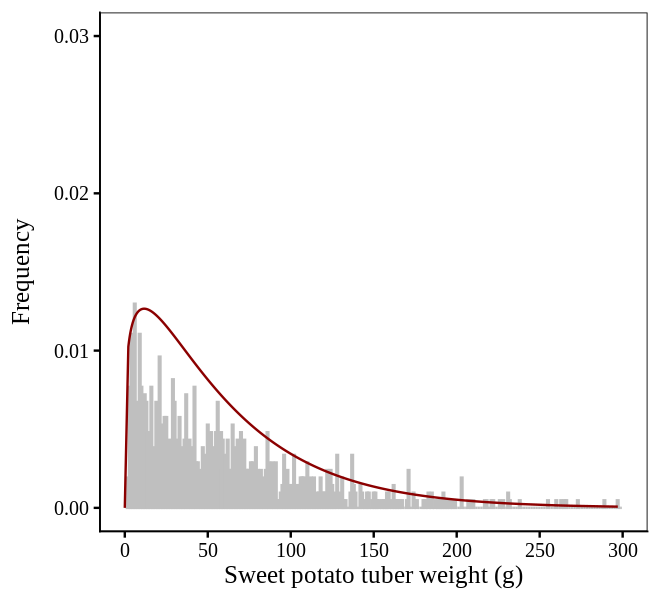

In [17]:
if(!require(ggplot2)) install.packages("ggplot2")
library (ggplot2)

suppressWarnings({

Fig1= ggplot(data=outputPDF, aes(x=weight)) +
  geom_histogram(aes(y=0.5*..density..), alpha=0.5,
                 position='identity', binwidth=1, color="grey75") +
  geom_line(data=outputPDF, aes(x=weight, y=PDF), color="darkred") +
  scale_x_continuous(breaks=seq(0,300,50), limits=c(0,300)) +
  scale_y_continuous(breaks=seq(0,0.03,0.01), limits=c(0,0.03)) +
  labs(x="Sweet potato tuber weight (g)", y="Frequency") +
  theme_classic(base_size=15, base_family="serif") +
  theme(legend.position=c(0.85, 0.85),
        legend.title=element_blank(),
        legend.key=element_rect(color="white", fill="white"),
        legend.text=element_text(family="serif", face="plain", size=15, color= "Black"),
        legend.background=element_rect(fill="white"),
        panel.border= element_rect(color="black", fill=NA, linewidth=0.5),
        axis.line=element_line(linewidth=0.5, colour="black"))

options(repr.plot.width=5.5, repr.plot.height=5)
print(Fig1)

ggsave("Fig1.png", plot= Fig1, width=5.5, height= 5, dpi= 300)

})

Example 1.1: Estimate Gamma parameters and compute CDF without grouping

In [18]:
outputCDF= gammacurve(df, variable="weight", func=2)
print(head(outputCDF,3))

# A tibble: 3 × 7
  weight Season      Nitrogen Block alpha_hat theta_hat    CDF
   <dbl> <chr>       <chr>    <chr>     <dbl>     <dbl>  <dbl>
1   0    NA          NA       NA         1.24      48.5 0     
2   0    2021_Season N0       I          1.24      48.5 0     
3   2.14 2020_Season N0       IV         1.24      48.5 0.0180


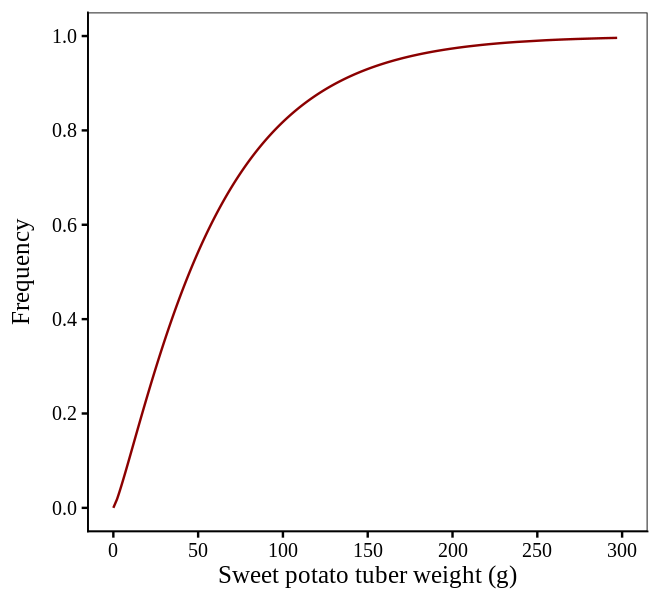

In [19]:
if(!require(ggplot2)) install.packages("ggplot2")
library (ggplot2)

suppressWarnings({

Fig2= ggplot(data=outputCDF, aes(x=weight)) +
  geom_line(data=outputCDF, aes(x=weight, y=CDF), color="darkred") +
  scale_x_continuous(breaks=seq(0,300,50), limits=c(0,300)) +
  scale_y_continuous(breaks=seq(0,1,0.2), limits=c(0,1)) +
  labs(x="Sweet potato tuber weight (g)", y="Frequency") +
  theme_classic(base_size=15, base_family="serif") +
  theme(legend.position=c(0.85, 0.85),
        legend.title=element_blank(),
        legend.key=element_rect(color="white", fill="white"),
        legend.text=element_text(family="serif", face="plain", size=15, color= "Black"),
        legend.background=element_rect(fill="white"),
        panel.border= element_rect(color="black", fill=NA, linewidth=0.5),
        axis.line=element_line(linewidth=0.5, colour="black"))

options(repr.plot.width=5.5, repr.plot.height=5)
print(Fig2)

ggsave("Fig2.png", plot= Fig2, width=5.5, height= 5, dpi= 300)

})

Example 2: Estimate Gamma parameters and compute PDF with grouping

In [20]:
outputPDFGroup= gammacurve(df, variable="weight", group=c("Season", "Nitrogen"), func=1)
print(head(outputPDFGroup,3))

# A tibble: 3 × 7
# Groups:   Season, Nitrogen [1]
  Season      Nitrogen weight Block alpha_hat theta_hat     PDF
  <chr>       <chr>     <dbl> <chr>     <dbl>     <dbl>   <dbl>
1 2020_Season N0         0    NA         1.33      41.4 0      
2 2020_Season N0         2.14 IV         1.33      41.4 0.00956
3 2020_Season N0         2.47 IV         1.33      41.4 0.00996


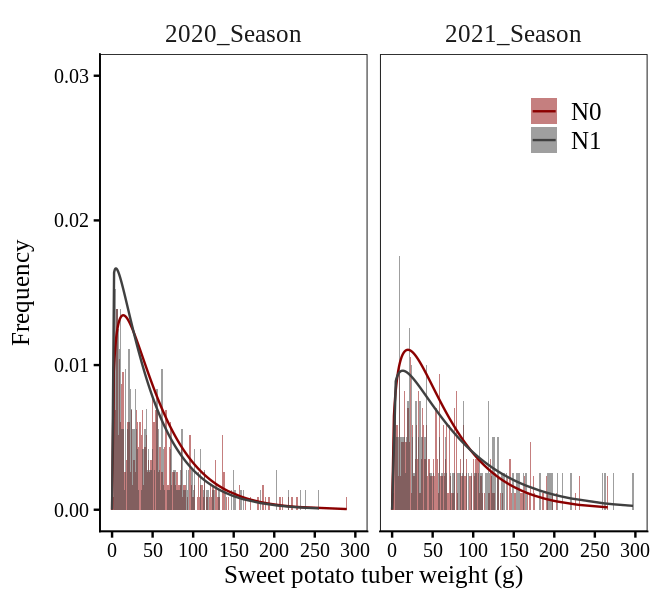

In [21]:
if(!require(ggplot2)) install.packages("ggplot2")
library (ggplot2)

suppressWarnings({

Fig3= ggplot(data=outputPDFGroup, aes(x=weight, fill=Nitrogen)) +
  geom_histogram(aes(y=0.5*..density..), alpha=0.5,
                 position='identity', binwidth=1.5) +
  geom_line(data=outputPDFGroup, aes(x=weight, y=PDF, group=Nitrogen, color=Nitrogen)) +
  scale_fill_manual(values=c("darkred","grey25"))+
  scale_color_manual(values= c("darkred", "grey25")) +
  scale_x_continuous(breaks=seq(0,300,50), limits=c(0,300)) +
  scale_y_continuous(breaks=seq(0,0.03,0.01), limits=c(0,0.03)) +
  facet_wrap(~ Season) +
  labs(x="Sweet potato tuber weight (g)", y="Frequency") +
  theme_classic(base_size=15, base_family="serif") +
  theme(legend.position=c(0.85, 0.85),
        legend.title=element_blank(),
        legend.key=element_rect(color="white", fill="white"),
        legend.text=element_text(family="serif", face="plain", size=15, color= "Black"),
        legend.background=element_rect(fill="white"),
        strip.background=element_rect(color="white", linewidth=0.5, linetype="solid"),
        strip.text = element_text(size = 15),
        panel.border= element_rect(color="black", fill=NA, linewidth=0.5),
        axis.line=element_line(linewidth=0.5, colour="black"))

options(repr.plot.width=5.5, repr.plot.height=5)
print(Fig3)

ggsave("Fig3.png", plot= Fig3, width=5.5, height= 5, dpi= 300)

})

Example 2.1: Estimate Gamma parameters and compute CDF with grouping

In [22]:
outputCDFGroup= gammacurve(df, variable="weight", group=c("Season", "Nitrogen"), func=2)
print(head(outputCDFGroup,3))

# A tibble: 3 × 7
# Groups:   Season, Nitrogen [1]
  Season      Nitrogen weight Block alpha_hat theta_hat    CDF
  <chr>       <chr>     <dbl> <chr>     <dbl>     <dbl>  <dbl>
1 2020_Season N0         0    NA         1.33      41.4 0     
2 2020_Season N0         2.14 IV         1.33      41.4 0.0157
3 2020_Season N0         2.47 IV         1.33      41.4 0.0189


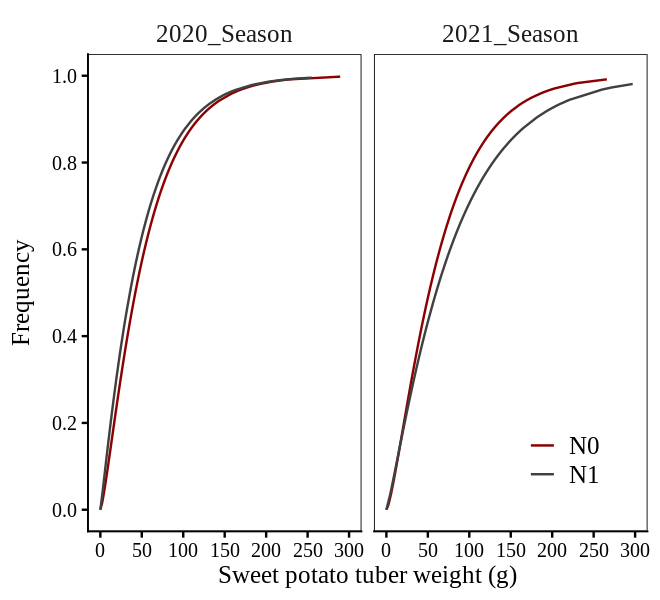

In [24]:
if(!require(ggplot2)) install.packages("ggplot2")
library (ggplot2)

suppressWarnings({

Fig4= ggplot(data=outputCDFGroup, aes(x=weight, fill=Nitrogen)) +
  geom_line(data=outputCDFGroup, aes(x=weight, y=CDF, group=Nitrogen, color=Nitrogen)) +
  scale_fill_manual(values=c("darkred","grey25"))+
  scale_color_manual(values= c("darkred", "grey25")) +
  scale_x_continuous(breaks=seq(0,300,50), limits=c(0,300)) +
  scale_y_continuous(breaks=seq(0,1,0.2), limits=c(0,1)) +
  facet_wrap(~ Season) +
  labs(x="Sweet potato tuber weight (g)", y="Frequency") +
  theme_classic(base_size=15, base_family="serif") +
  theme(legend.position=c(0.85, 0.15),
        legend.title=element_blank(),
        legend.key=element_rect(color="white", fill="white"),
        legend.text=element_text(family="serif", face="plain", size=15, color= "Black"),
        legend.background=element_rect(fill="white"),
        strip.background=element_rect(color="white", linewidth=0.5, linetype="solid"),
        strip.text = element_text(size = 15),
        panel.border= element_rect(color="black", fill=NA, linewidth=0.5),
        axis.line=element_line(linewidth=0.5, colour="black"))

options(repr.plot.width=5.5, repr.plot.height=5)
print(Fig4)

ggsave("Fig4.png", plot= Fig4, width=5.5, height= 5, dpi= 300)

})